## Software Specifications

To run this Jupyter Notebook, you need the following software and libraries:

- **Visual Studio Code (VSCode)**: Recommended for editing and running Jupyter Notebooks
- **Python**: Version 3.6 or higher
- **Jupyter Notebook**: Version 6.0 or higher
- **Pandas**: Version 1.0 or higher
- **Random**: Standard Python library
- **Matplotlib**: Version 3.0 or higher

# Game update description

In this simulation V3 you can chose the amount of players yourself and enter their guess amount

## Instructions how to play:

1. Enter the total number of players.
2. Enter the names of each player.
3. Start round 1 where each player guesses a number between 500 and 999.

    Play untill everybody wins at least one round!


    See how many original names you can come up with in this simulation.
    So in case you don't know, you have to input the names and values in the terminal.
    If you are opening this in VS code. Enter the values in the searchbar on top of your screen.

    I am working hard on providing you a GUI in python. This is all for now. 

    Cheers thank you!

---

## Project Skyline

This project simulates a game where players make guesses to win rounds and accumulate amounts based on their guesses. The game continues until only one player remains eligible to win a round. The simulation provides insights into player behavior and decision-making, which can be analyzed for various purposes, including economic research and gamification techniques.



Round 1:
Winner of the round: james
Pot for this round: 4440

Round 2:
Winner of the round: jessy
Pot for this round: 4440

Round 3:
Winner of the round: cynthia
Pot for this round: 4440

Round 4:
Winner of the round: tracy
Pot for this round: 4440

Round 5:
Winner of the round: misty
Pot for this round: 5328

Round 6:
Winner of the round: may
Pot for this round: 6216

Round 7:
Winner of the round: gary
Pot for this round: 7104

Round 8:
Winner of the final round: aash
Pot for this round: 8000

Summary Statistics:

Player: aash
Guesses per round:
Round 1: 999
Round 2: 999
Round 3: 999
Round 4: 999
Round 5: 999
Round 6: 999
Round 7: 999
Round 8: Default amount (1000) for final round

Player: gary
Guesses per round:
Round 1: 888
Round 2: 888
Round 3: 888
Round 4: 888
Round 5: 888
Round 6: 888
Round 7: 888
Round 8: Default amount (1000) for final round

Player: may
Guesses per round:
Round 1: 777
Round 2: 777
Round 3: 777
Round 4: 777
Round 5: 777
Round 6: 777
Round 7: 1000
Round 8: Defa

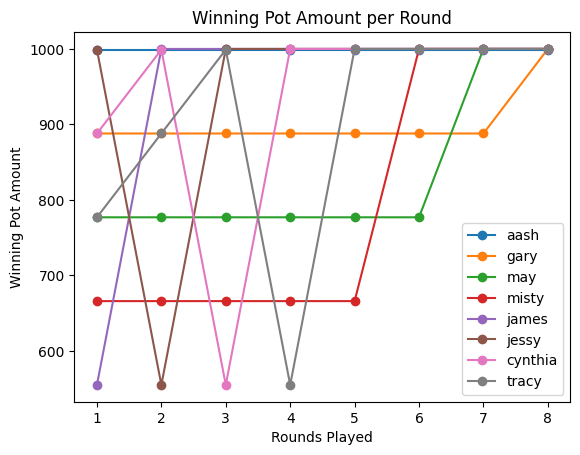

In [7]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)



Round 1:
Winner of the round: steve
Pot for this round: 6840

Round 2:
Winner of the round: tracy
Pot for this round: 7296

Round 3:
Winner of the round: james
Pot for this round: 7200

Round 4:
Winner of the round: gary
Pot for this round: 7120

Round 5:
Winner of the round: may
Pot for this round: 7200

Round 6:
Winner of the round: misty 
Pot for this round: 7648

Round 7:
Winner of the round: jacy 
Pot for this round: 7848

Round 8:
Winner of the final round: aash
Pot for this round: 8000

Summary Statistics:

Player: aash
Guesses per round:
Round 1: 999
Round 2: 999
Round 3: 999
Round 4: 999
Round 5: 999
Round 6: 999
Round 7: 999
Round 8: Default amount (1000) for final round

Player: gary
Guesses per round:
Round 1: 988
Round 2: 986
Round 3: 940
Round 4: 890
Round 5: 1000
Round 6: 1000
Round 7: 1000
Round 8: Default amount (1000) for final round

Player: may
Guesses per round:
Round 1: 977
Round 2: 958
Round 3: 960
Round 4: 910
Round 5: 900
Round 6: 1000
Round 7: 1000
Round 8: D

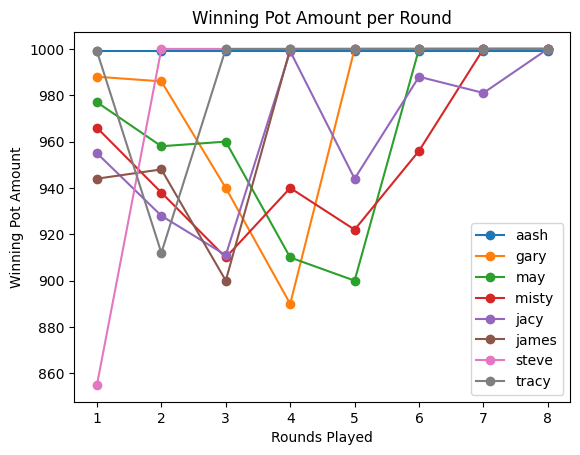

In [8]:
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name):
        self.name = name
        self.rounds_won = 0
        self.amount = 0  # Initialize amount to 0
        self.guesses = []   # List to store guesses for each round

    def make_guess(self, default_amount, round_number):
        if self.rounds_won == 0:  # Only allow guesses if the player hasn't won a round yet
            guess = self.get_guess_input(default_amount, round_number)
            self.guesses.append(guess)
        else:
            # Set the guess to the default amount for the final round for all players
            self.guesses.append(default_amount)

    def get_guess_input(self, default_amount, round_number):
        while True:
            try:
                guess = int(input(f"{self.name}, enter your guess for round {round_number} (between 500 and {default_amount - 1}): "))
                if 500 <= guess < default_amount:
                    return guess
                else:
                    print(f"Your guess must be between 500 and {default_amount - 1}. Try again.")
            except ValueError:
                print("Invalid input. Please enter a number.")

def play_game(players):
    num_players = len(players)
    default_amount = 1000

    round_number = 1
    while True:
        print(f"\nRound {round_number}:")

        # Each player makes a guess if they haven't won a round yet
        for player in players:
            player.make_guess(default_amount, round_number)

        # Determine the winner of the round
        eligible_players = [player for player in players if player.rounds_won == 0]
        if len(eligible_players) == 1:
            winner = eligible_players[0]
            winner.rounds_won += 1
            pot = default_amount * num_players  # Final round pot is always default_amount * num_players
            winner.amount += pot
            print(f"Winner of the final round: {winner.name}")
            print(f"Pot for this round: {pot}")
            break  # End the game if there's only one player left to win a round

        # Calculate the pot for the round
        pot = min(player.guesses[round_number - 1] for player in eligible_players) * num_players

        # Determine the winner of the round
        winner = min(eligible_players, key=lambda x: min(x.guesses))
        winner.rounds_won += 1

        # Distribute the pot
        winner.amount += pot
        for player in players:
            if player != winner:
                player.amount -= player.guesses[round_number - 1]  # Deduct each player's guess from their amount

        print(f"Winner of the round: {winner.name}")
        print(f"Pot for this round: {pot}")

        round_number += 1

    # For the final round, set the amount paid to the default amount for all players
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            player.amount = default_amount * (player.rounds_won - 1)

    # Compute summary stats for each player
    print("\nSummary Statistics:")
    for player in players:
        if player.rounds_won > 0:  # Only for players who have won a round
            print(f"\nPlayer: {player.name}")
            print("Guesses per round:")
            for i, guess in enumerate(player.guesses):
                if guess is not None and i < len(player.guesses) - 1:  # Display actual guess if not the final round
                    print(f"Round {i + 1}: {guess}")
                else:
                    print(f"Round {i + 1}: Default amount ({default_amount}) for final round")

    plot_summary(players)

def plot_summary(players):
    rounds = list(range(1, len(players[0].guesses) + 1))
    winners = [player for player in players if player.rounds_won > 0]
    
    for player in winners:
        plt.plot(rounds, player.guesses, marker='o', label=player.name)

    plt.xlabel('Rounds Played')
    plt.ylabel('Winning Pot Amount')
    plt.title('Winning Pot Amount per Round')
    plt.legend()
    plt.show()

# Set the total number of players
num_players = int(input("Enter the total number of players: "))

# Add names for each player manually
players = []
for i in range(num_players):
    name = input(f"Enter the name for player {i + 1}: ")
    players.append(Player(name))

# Play the game
play_game(players)
